## <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUX6O-4BsthBE_xhtLuEN0CNFxzn8RY8DOJvuE-0SzEBcxCNAo7V51BuUDrUGISmMgVWs&usqp=CAU" height="20" width="22" /> 구글 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Data Processing (데이터 전처리가 이미 되어 있다면 생략 가능)

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/data/TTS                              # 작업 디렉토리를 변경
!cp "/content/drive/My Drive/Colab Notebooks/data/filelists.zip" ./filelists.zip  # # filelists.zip을 현재 디렉토리로 복사
!rm -rf ./filelists                                                               # './filelists' 디렉토리를 삭제(이미 있는 경우를 대비하여)
!unzip -q filelists.zip -d ./filelists                                            # 'filelists.zip' 파일을 압축 해제 '-q' 옵션은 출력을 최소화하고 '-d' 옵션은 압축을 해제할 디렉토리를 지정

/content/drive/My Drive/coqui
cp: '/content/drive/My Drive/coqui/filelists.zip' and './filelists.zip' are the same file


In [ ]:
import pandas as pd                                                                     # pandas 라이브러리를 불러오고
%cd /content/drive/My Drive/Colab Notebooks/data/TTS                                    # 작업 폴더를 설정한 후
metadata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/TTS/filelists/metadata.csv', delimiter='\t', header=None)  # csv파일을 dataframe으로 저장하
metadata[0] = metadata[0].apply(lambda x: x.split('|')[0] + '.wav|' + x.split('|')[1])  # 첫번째와 두번째 열 사이에 .wav|를 넣고
print(f'총 문장 개수: {len(metadata)}개')                                               # 문장의 개수를 출력하고
metadata.head()                                                                         # 데이터 프레임을 표시한다

/content/drive/My Drive/coqui
총 문장 개수: 400개


,0
0,549a42a1344f5257be84db81d6dbf106.wav|떡볶이를 다 먹고...
1,2f8126231e180e6d8905c7c3677ce8fb.wav|마치 슬픔이 달콤...
2,df1ef29f687825b3ff02007878562c70.wav|제가 내야 할 몫...
3,62a8c15d92bd87c92696d240a7fc85a2.wav|제가 시킨 스테이...
4,3deadb6602581f80145443a6e7a59172.wav|터널은 인터넷에서...


In [ ]:
output_file_path = '/content/drive/My Drive/Colab Notebooks/data/TTS//filelists/metadata.txt'   # 경로를 지정하고
with open(output_file_path, 'w') as file:                                                       # 경로에 있는 파일을 쓰기ㅂ모드로 열어서
    for item in metadata[0]:                                                                    # 메타데이터를 반복해서
        file.write("%s\n" % item)                                                               # 파일에 쓰고
print(f"Data has been saved to {output_file_path}")                                             # 모두 작성 후 데이터가 저장된 경로를 출력한다

Data has been saved to /content/drive/My Drive/coqui/filelists/metadata.txt


In [ ]:
import glob as gb                                                                                        # glob 라이브러리를 불러오
wav_list = [w for w in gb.glob('/content/drive/My Drive/Colab Notebooks/data/TTS/filelists/wavs/*.wav')] # wav 음성파일을 리스트로 저장한 후
print(f'총 .wav 파일 개수: {len(wav_list)}개')                                                           # 파일의 개수를 출력한다

총 .wav 파일 개수: 400개


## Sampling rate 체크하기

- 오디오 신호를 디지털 형태로 변환할 때 사용되는 샘플의 수를 나타냅니다. 높은 샘플링 레이트는 더 많은 샘플을 사용하므로 더 높은 해상도와 품질을 제공

In [ ]:
import librosa                                                                   # librosa 라이브러리를 불러오고
sample_rate_list = []                                                            # 샘플 레이트를 저장할 리스트 생성
import os                                                                        # os를 불러오고
folder_path = '/content/drive/My Drive/Colab Notebooks/data/TTS/filelists/wavs/' # WAV 파일이 들어있는 폴더 경로 지정
file_list = os.listdir(folder_path)                                              # 해당 폴더 내 모든 파일 목록 가져와서 저장한 후
for file_name in file_list:                                                      # 파일 목록을 반복해서
    if file_name.endswith('.wav'):                                               # .wav로 끝나는 파일이라면
        path = os.path.join(folder_path, file_name)                              # 파일의 경로를 새엉해
        sample_rate_list.append(librosa.get_samplerate(path))                    # librosa를 사용하여 해당 WAV 파일의 샘플 레이트를 얻어와 리스트에 추가한다

<ipython-input-11-66bee76bcea8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


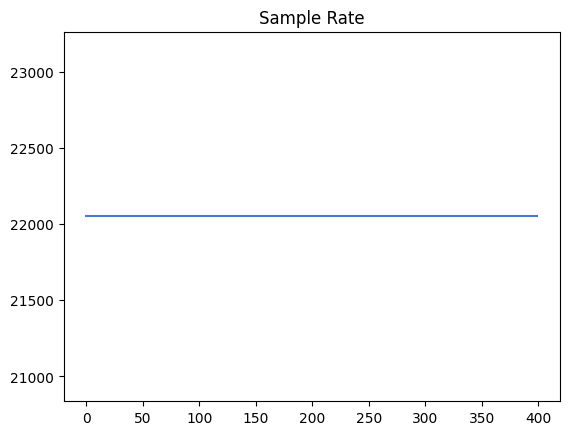

In [ ]:
import matplotlib.pyplot as plt  # matplotlib 라이브러리에서 pyplot 모듈을 불러오고
plt.style.use('seaborn-muted')   # 시각화 스타일 설정 (seaborn-muted)한다
plt.plot(sample_rate_list)       # 위에서 저장한 샘플레이트로 시각화
plt.title('Sample Rate');        # 시각화 테이블 이름 추가

## 오디오 길이 분포 확인하기

In [ ]:
duration_list = []                                                # 오디오 지속 시간을 저장할 리스트를 생성하고
folder_path = '/content/drive/My Drive/Colab Notebooks/data/TTS/filelists/wavs/' # WAV 파일이 들어있는 폴더 경로 지정
file_list = os.listdir(folder_path)                               # 해당 폴더 내 모든 파일 목록 가져와서 저장한 후
for file_name in file_list:                                       # 파일 목록을 반복해서
    if file_name.endswith('.wav'):                                # .wav로 끝나는 파일이라면
        path = os.path.join(folder_path, file_name)               # 파일의 전체 경로를 생성를 생성하고
        duration_list.append(librosa.get_duration(filename=path)) # librosa를 사용하여 해당 WAV 파일의 길이를 리스트에 추가

<ipython-input-13-53c7e0ed52d5>:11: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  duration_list.append(librosa.get_duration(filename=path))


<ipython-input-14-96a488290f6e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


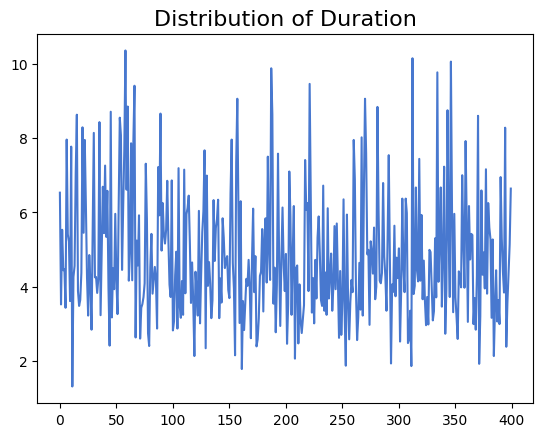

In [ ]:
plt.style.use('seaborn-muted')                   # 시각화 스타일 설정 (seaborn-muted)한
plt.plot(duration_list)                          # 위에서 저장한 오디오 길이를 시각화
plt.title('Distribution of Duration', size=16);  # 시각화 테이블 이름 추가

## Check Data Format

%cd content/drvie/My Drive/Colab Notebooks
/data
    | ->filelists.zip
    | ->TTS(모델 학습용)
        | -> filelists
            | ->wavs
                | ->음성파일.wav
                | ->음성파일.wav
                | ->음성파일.wav
            | ->metadata.csv
            | ->ljs_audio_text_train_filelist.txt
    | ->TTS-dev(모델 합성용)
    | ->g2pk
    | ->glowtts-v2
        | ->model_file.pth.tar(프리트레인 모델)
        | ->glowtts-v2-December-24-2023_05+08PM-3aa165a(학습 결과 파)
        | ->config.json(프리트레인 환경변수)
    | ->hifigan-v2
        | ->model_file.pth.tar(프리트레인 모델)
        | ->hifigan-v2-December-22-2023_03+20PM-3aa165a
        | ->config.json(프리트레인 환경변수)

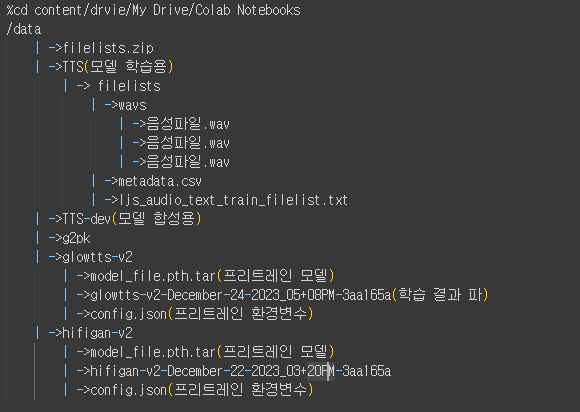
